In [47]:
import time
import numpy as np
import matplotlib.pyplot as pl
from scipy.spatial.distance import cdist
%matplotlib notebook
pl.ion()
pl.rcParams['figure.figsize'] = 12, 6

_colors = list('mybrgyk')
get_colors = lambda x: np.array([_colors[i] for i in x])
np.random.seed(123)

In [52]:
# Parameters
n_clusters = 6
pt_in_cluster = 100
cluster_offset = 2

In [53]:
# Instantiate data
X = np.random.randn(n_clusters*pt_in_cluster, 2)
xcls = np.zeros(n_clusters*pt_in_cluster).astype(int)

# Create separated clusters
for i in range(n_clusters):
    i1, i2 = i * pt_in_cluster, (i + 1) * pt_in_cluster
    X[i1:i2,:] += cluster_offset * i
    xcls[i1:i2] += i

X.shape, xcls.shape

((600, 2), (600,))

In [54]:
# Draw true clusters
pl.scatter(X[:,0], X[:,1], c=get_colors(xcls))
pl.title('Input Data - 2 Clusters');

<IPython.core.display.Javascript object>


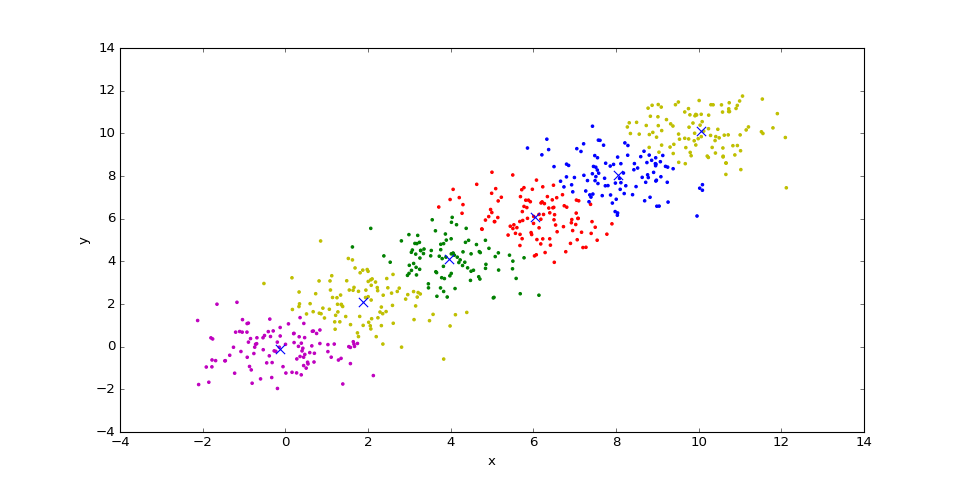

updated centers:
[[ 0.45290083  0.52467014]
 [ 9.47505876  9.62452978]
 [ 7.16780995  6.86441638]
 [ 5.49642486  4.67348906]
 [ 4.00082418  5.40374213]
 [ 2.89125764  3.05430979]]
updated centers:
[[ 0.26786709  0.30799452]
 [ 9.67312466  9.70374109]
 [ 7.09765104  7.14153896]
 [ 5.62292717  4.55008812]
 [ 3.99439442  5.2951281 ]
 [ 2.68820455  2.83622269]]
updated centers:
[[ 0.15145692  0.19877557]
 [ 9.74687846  9.77263357]
 [ 7.15432866  7.288398  ]
 [ 5.78217131  4.57391088]
 [ 3.97160484  5.17187116]
 [ 2.50931069  2.67687111]]
updated centers:
[[ 0.07884889  0.12856904]
 [ 9.78140804  9.8200466 ]
 [ 7.21952294  7.35794724]
 [ 5.87387432  4.62386691]
 [ 4.01021137  5.10499687]
 [ 2.40217058  2.57598049]]
updated centers:
[[  4.56327797e-03   7.81407912e-02]
 [  9.79753176e+00   9.84459806e+00]
 [  7.26131435e+00   7.42561628e+00]
 [  6.00122882e+00   4.76435327e+00]
 [  4.03100633e+00   5.01108114e+00]
 [  2.33824568e+00   2.48511313e+00]]
updated centers:
[[ -2.20160470e-03   4.

In [57]:
# Instantiate cluster centers with random points
# Originally I generated random points, but that would occasionally 
# cause some centroids to not have any points and drop out (get nan values).
# This ensures that there will be at least 1 point for each centroid
centers = X[np.random.randint(X.shape[0], size=n_clusters)]

# Create figure
fig, ax = pl.subplots()
lx = ax.scatter(X[:,0], X[:,1], marker='.')
lc = ax.scatter(centers[:,0], centers[:,1], marker='x', s=70)
ax.set_xlabel('x')
ax.set_ylabel('y')
pl.show()

# params
threshold = 0.1
max_iter = 50
update_period = 0.5

# Run 
while True:
    # Store clusters for comparison
    lastc = centers
    
    # Calculate distances and get new cluster assignments
    distances = cdist(X, centers)
    newcl_assignments = np.argmin(distances, axis=1)
    
    # Update centers
    centers = np.array([
        X[newcl_assignments == i].mean(0)
        for i in range(n_clusters)
    ])
    
    # Update plot
    lx.set_color(get_colors(newcl_assignments))
    lc.set_offsets(centers)
    fig.canvas.draw()
    print('updated centers:')
    print(centers)
    
    # End loop if distance is small enough or on max iterti
    if np.sqrt(np.sum((centers - lastc)**2)) < threshold or not max_iter:
        print('final iteration change', np.sqrt(np.sum((centers - lastc)**2)))
        break
    max_iter -= 1
    time.sleep(update_period)
    